In [163]:
import json
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
import pandas as pd

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical

print(tf.VERSION)
print(tf.keras.__version__)

with open(
        '/Users/bakunowski/Documents/goldsmiths/2018_19/dissertation/project/neural/MFCC_new.json'
) as f:
    d2 = json.load(f)


mfcc = np.array(d2["lowlevel"]["mfcc"])[0:38700].reshape(860, 45, 13)
print(mfcc.shape)


with open(
        '/Users/bakunowski/Documents/goldsmiths/2018_19/dissertation/project/neural/parameters_new.json'
) as f:
    d1 = json.load(f)

duration = np.array(d1["parameters"]["duration"])[0:860].reshape(860, 1)
numberOfGrains = np.array(d1["parameters"]["numberOfGrains"])[0:860].reshape(860, 1)
pitch = np.array(d1["parameters"]["pitch"])[0:860]
position = np.array(d1["parameters"]["position"])[0:860].reshape(860, 1)
spread = np.array(d1["parameters"]["spread"])[0:860].reshape(860, 1)

# parameters = np.concatenate(
#     (duration, numberOfGrains, pitch, position, spread), axis=1)

# print(test.shape)
print(mfcc.shape)

# print(test.shape)
print(pitch.shape)

X_train = mfcc[:800].reshape(800, 45, 13, 1)
# y_train = parameters
y_train = pitch[:800]+12
print(len(np.unique(pitch)))
print(np.unique(y_train))

X_test = mfcc[800:860].reshape(60, 45, 13, 1)
y_test = pitch[800:860]+12

print(np.min(X_train))

np.set_printoptions(suppress=True)
print("Train dimensions", X_train.shape)
print("Train labels dimensions", y_train.shape)

y_train_hot = to_categorical(y_train)
y_test_hot = to_categorical(y_test)

print(y_train_hot)

1.13.1
2.2.4-tf
(860, 45, 13)
(860, 45, 13)
(860,)
24
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
-1138.42004395
Train dimensions (800, 45, 13, 1)
Train labels dimensions (800,)
[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


TypeError: Invalid dimensions for image data

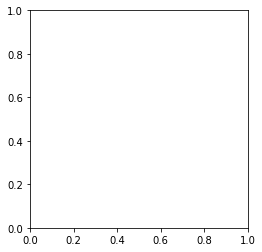

In [161]:
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

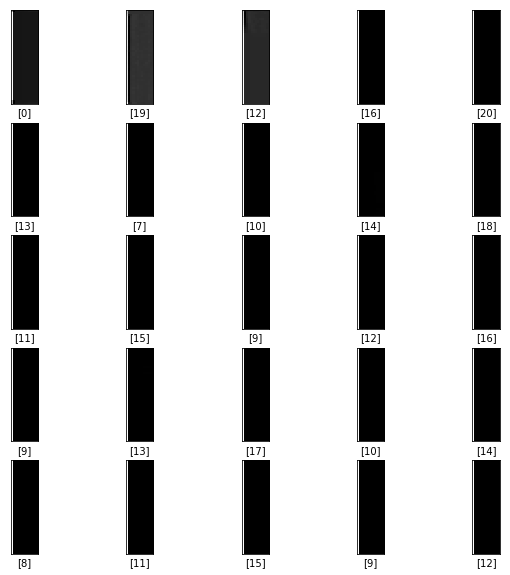

In [159]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel([y_train[i]])
plt.show()

In [162]:
# wrong dimensions ?????????
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), activation='relu', input_shape=(45, 13, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(24, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
model.fit(X_train, y_train_hot, batch_size=500, epochs=200, verbose=1)

Epoch 1/200
800/800 [==============================] - 4s 4ms/step - loss: 15.3824 - acc: 0.0350
Epoch 2/200
800/800 [==============================] - 0s 212us/step - loss: 15.3847 - acc: 0.0425
Epoch 3/200
800/800 [==============================] - 0s 194us/step - loss: 15.2392 - acc: 0.0437
Epoch 4/200
800/800 [==============================] - 0s 180us/step - loss: 15.2754 - acc: 0.0512
Epoch 5/200
800/800 [==============================] - 0s 174us/step - loss: 15.3375 - acc: 0.0463
Epoch 6/200
800/800 [==============================] - 0s 198us/step - loss: 15.3418 - acc: 0.0475
Epoch 7/200
800/800 [==============================] - 0s 178us/step - loss: 15.3525 - acc: 0.0475
Epoch 8/200
800/800 [==============================] - 0s 185us/step - loss: 15.3525 - acc: 0.0475
Epoch 9/200
800/800 [==============================] - 0s 230us/step - loss: 15.3323 - acc: 0.0488
Epoch 10/200
800/800 [==============================] - 0s 196us/step - loss: 15.3323 - acc: 0.0487
Epoch 11/20

800/800 [==============================] - 0s 160us/step - loss: 15.3525 - acc: 0.0475
Epoch 84/200
800/800 [==============================] - 0s 152us/step - loss: 15.3383 - acc: 0.0475
Epoch 85/200
800/800 [==============================] - 0s 148us/step - loss: 15.3525 - acc: 0.0475
Epoch 86/200
800/800 [==============================] - 0s 152us/step - loss: 15.3543 - acc: 0.0463
Epoch 87/200
800/800 [==============================] - 0s 146us/step - loss: 15.3525 - acc: 0.0475
Epoch 88/200
800/800 [==============================] - 0s 158us/step - loss: 15.3525 - acc: 0.0475
Epoch 89/200
800/800 [==============================] - 0s 144us/step - loss: 15.3525 - acc: 0.0475
Epoch 90/200
800/800 [==============================] - 0s 142us/step - loss: 15.3525 - acc: 0.0475
Epoch 91/200
800/800 [==============================] - 0s 144us/step - loss: 15.3525 - acc: 0.0475
Epoch 92/200
800/800 [==============================] - 0s 152us/step - loss: 15.3525 - acc: 0.0475
Epoch 93/200


800/800 [==============================] - 0s 163us/step - loss: 15.3525 - acc: 0.0475
Epoch 165/200
800/800 [==============================] - 0s 158us/step - loss: 15.3525 - acc: 0.0475
Epoch 166/200
800/800 [==============================] - 0s 154us/step - loss: 15.3525 - acc: 0.0475
Epoch 167/200
800/800 [==============================] - 0s 147us/step - loss: 15.3525 - acc: 0.0475
Epoch 168/200
800/800 [==============================] - 0s 158us/step - loss: 15.3525 - acc: 0.0475
Epoch 169/200
800/800 [==============================] - 0s 156us/step - loss: 15.3525 - acc: 0.0475
Epoch 170/200
800/800 [==============================] - 0s 153us/step - loss: 15.3525 - acc: 0.0475
Epoch 171/200
800/800 [==============================] - 0s 154us/step - loss: 15.3525 - acc: 0.0475
Epoch 172/200
800/800 [==============================] - 0s 156us/step - loss: 15.3525 - acc: 0.0475
Epoch 173/200
800/800 [==============================] - 0s 147us/step - loss: 15.3525 - acc: 0.0475
Epoc

In [144]:
model.predict(X_test)

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)